In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
DF = pd.read_csv("Mall_Customers_2.csv")
DF

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15,39.0
1,2,Male,21.0,15,81.0
2,3,Female,20.0,16,6.0
3,4,Female,23.0,16,77.0
4,5,Female,31.0,17,40.0
...,...,...,...,...,...
195,196,Female,35.0,120,79.0
196,197,Female,45.0,126,28.0
197,198,Male,32.0,126,74.0
198,199,Male,32.0,137,18.0


In [3]:
DF.info()
# Kiểm tra thông tin 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   200 non-null    object 
 2   Age                     195 non-null    float64
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  197 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [4]:
DF1 = DF.copy()

In [5]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
# Xử lý missing data bằng SimpleImputer lấy giá trị trung bình

In [6]:
DF1[['Age']] = imputer.fit_transform(DF1[['Age']])
DF1[['Spending Score (1-100)']] = imputer.fit_transform(DF1[['Spending Score (1-100)']])

DF1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15,39.0
1,2,Male,21.0,15,81.0
2,3,Female,20.0,16,6.0
3,4,Female,23.0,16,77.0
4,5,Female,31.0,17,40.0
...,...,...,...,...,...
195,196,Female,35.0,120,79.0
196,197,Female,45.0,126,28.0
197,198,Male,32.0,126,74.0
198,199,Male,32.0,137,18.0


In [7]:
DF1.info()
# Kiểm tra lại thông tin sau khi xử lý

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   200 non-null    object 
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


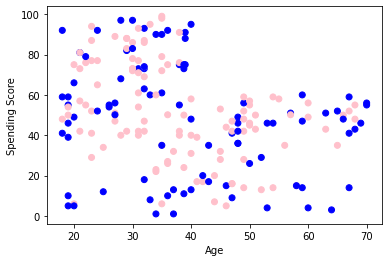

In [8]:
color = np.array(['blue' if GT == 'Male' else 'pink' for GT in DF1['Genre']])
# Tạo mảng màu cho biểu đồ scatter

plt.scatter(DF1['Age'].values, DF1['Spending Score (1-100)'].values, c=color)
# Vẽ biểu đò scatter với dãy dữ liệu Age và Spending Score, cùng với màu sử dụng là mảng màu ở trên
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [9]:
DF2 = DF1.copy()

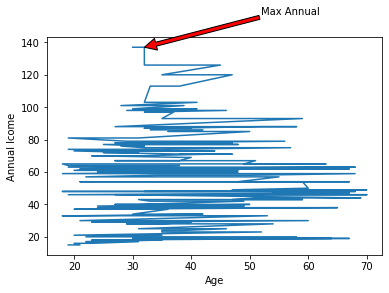

In [10]:
Age = DF2['Age']
AnnualIncome = DF2['Annual Income (k$)']

plt.plot(Age, AnnualIncome)
plt.xlabel('Age')
plt.ylabel('Annual Icome')

indexMaxValue = AnnualIncome.argmax()
# Lấy vị trí mang giá trị max trong Annual Income

coor = (Age[indexMaxValue], AnnualIncome[indexMaxValue])
# Lấy tọa độ của vị trí Max

plt.annotate('Max Annual', xy = coor, xytext = (coor[0] + 20, coor[1] + 20), arrowprops = dict(facecolor = 'red'))
# Vẽ mũi tên chỉ vào tọa độ Max

plt.show()